<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Titanic:-Machine-Learning-from-Disaster" data-toc-modified-id="Titanic:-Machine-Learning-from-Disaster-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Titanic: Machine Learning from Disaster</a></span><ul class="toc-item"><li><span><a href="#Objective:" data-toc-modified-id="Objective:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Objective:</a></span></li><li><span><a href="#The-Challenge" data-toc-modified-id="The-Challenge-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The Challenge</a></span></li><li><span><a href="#What-Data-Will-I-Use-in-This-Competition?" data-toc-modified-id="What-Data-Will-I-Use-in-This-Competition?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>What Data Will I Use in This Competition?</a></span></li><li><span><a href="#Data-Dictionary:" data-toc-modified-id="Data-Dictionary:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Dictionary:</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Let's-look-at-the-distribution-of-the-dependant-variable" data-toc-modified-id="Let's-look-at-the-distribution-of-the-dependant-variable-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Let's look at the distribution of the dependant variable</a></span></li><li><span><a href="#Let's-take-a-quick-look-at-the-correlation-matrix" data-toc-modified-id="Let's-take-a-quick-look-at-the-correlation-matrix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Let's take a quick look at the correlation matrix</a></span></li><li><span><a href="#EDA---continued" data-toc-modified-id="EDA---continued-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>EDA - continued</a></span><ul class="toc-item"><li><span><a href="#Survival-and-PClass" data-toc-modified-id="Survival-and-PClass-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Survival and PClass</a></span></li><li><span><a href="#Survival-and-Age" data-toc-modified-id="Survival-and-Age-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Survival and Age</a></span></li><li><span><a href="#Fare" data-toc-modified-id="Fare-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Fare</a></span></li><li><span><a href="#Survival-and-Sex" data-toc-modified-id="Survival-and-Sex-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Survival and Sex</a></span></li><li><span><a href="#Survival-and-Embarked" data-toc-modified-id="Survival-and-Embarked-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Survival and Embarked</a></span></li></ul></li></ul></li></ul></div>

# Titanic: Machine Learning from Disaster

## Objective:
    - The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
    - Here is the link to the original competition: 
[link](https://www.kaggle.com/c/titanic/overview) 

## The Challenge

- The sinking of the Titanic is one of the most infamous shipwrecks in history.

- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

- In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## What Data Will I Use in This Competition?
- In this competition, you’ll gain access to two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled `train.csv` and the other is titled `test.csv`.

- Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

- The `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

- Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived.

## Data Dictionary: 
1. survival	: Survival	0 = No, 1 = Yes
2. pclass	: Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
3. sex	: Sex	
4. Age	: Age in years	
5. sibsp :	# of siblings / spouses aboard the Titanic	
6. parch :	# of parents / children aboard the Titanic	
7. ticket :	Ticket number	
8. fare :	Passenger fare	
9. cabin :	Cabin number	
10. embarked :	Port of Embarkation,	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
import warnings
warnings.filterwarnings(action='once')

In [3]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Reading the data
train_df = pd.read_csv('./Data/train.csv')
test_df = pd.read_csv('./Data/test.csv')
sample_submission = pd.read_csv('./Data/gender_submission.csv')

# EDA

In [5]:
# Let's look at the first few rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Let's look at the shape
train_df.shape

(891, 12)

In [36]:
# Lets look at some summary stats
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [37]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- At a first glance, seems there are a quite a few missing values in Age, Cabin.
- Based on the mean and std numbers, it would seem most travellers were in the 15-45 age bracket.

## Let's look at the distribution of the dependant variable

[Text(0.5, 1.0, 'Distribution of survival rate')]

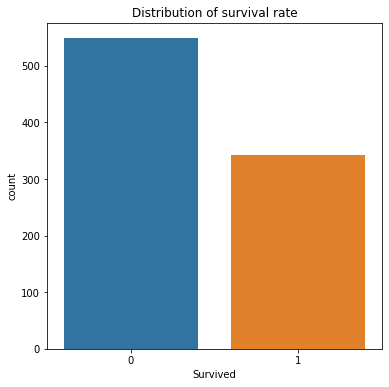

In [67]:
# Setting plot area
f, ax = plt.subplots(figsize=(6, 6))

# plotting the distribution
sns.countplot(data = train_df,
              x = 'Survived')

ax.set(title="Distribution of survival rate")

- Seems (expectedly) that the overall survival rate was low.

## Let's take a quick look at the correlation matrix

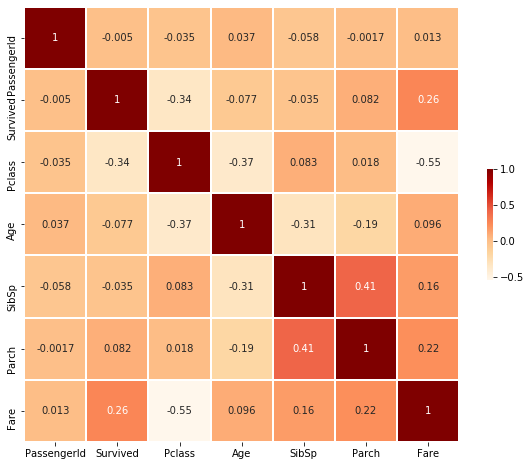

In [32]:
# Calc correlation matrix
corr_mat = train_df.corr()

# Set plot size
plt.subplots(figsize=(10,8))

# Plot heatmap
sns.heatmap(corr_mat, 
            square=True, 
            robust=True, 
            cmap='OrRd', # use orange/red colour map
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            linewidth=1,
            annot = True) # space between cells

- It seems that Class and Fare have the most obvious correlation (although not a lot).
- I would have expected Age, SibSp and Parch to have some correlation as well. But as noted earlier, age has some missing values. Also, it might be worthwhile to engineer a feature based on SibSp and Parch.

## EDA - continued

- Lets do a quick bivariate analysis

### Survival and PClass

[Text(0.5, 1.0, 'Distribution of survival rate by Pclass')]

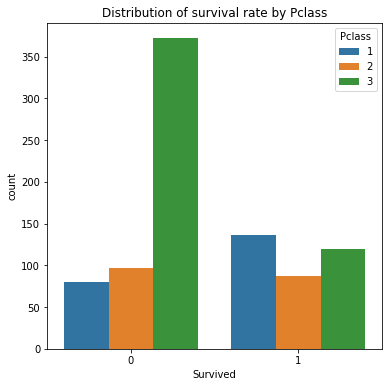

In [38]:
# Setting plot area
f, ax = plt.subplots(figsize=(6, 6))

# plotting the distribution
sns.countplot(data = train_df,
              x = 'Survived',
              hue='Pclass')

ax.set(title="Distribution of survival rate by Pclass")

- Clearly, class 3 suffered the highest casualities while passengers from class 1 had a higher survival rate. This could be because the affluent were given a priority duting the evacuation.

### Survival and Age

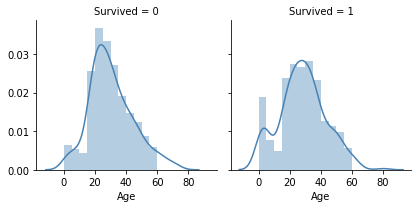

In [52]:
# Creating faceted histograms
g = sns.FacetGrid(train_df, col = "Survived", margin_titles = True)
bins = np.linspace(0, 60, 13)
g.map(sns.distplot, "Age", color="steelblue", bins=bins)

- Seems there is no obvious linear correlation between age and Survival probability.
- We know that most travellers were between 15-45, which is quite clear here. 
- There don't seem to be a lot of 60+ travellers.
- Babies and children seem to have a higher survival rate than the rest of the group.

### Fare

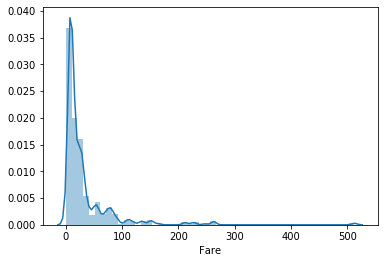

In [61]:
sns.distplot(train_df['Fare'])

In [63]:
#skewness and kurtosis
print("Skewness: %f" % train_df['Fare'].skew())
print("Kurtosis: %f" % train_df['Fare'].kurt())

Skewness: 4.787317
Kurtosis: 33.398141


- Clearly, the feature is highly skewed and we will have to log transform it before training the model

### Survival and Sex

[Text(0.5, 1.0, 'Distribution of survival rate')]

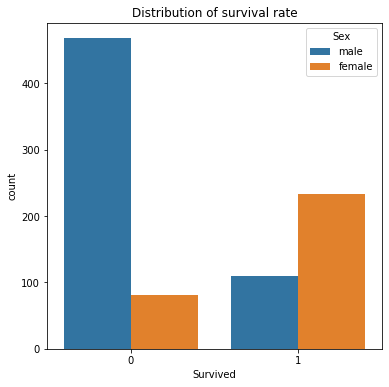

In [69]:
# Setting plot area
f, ax = plt.subplots(figsize=(6, 6))

# plotting the distribution
sns.countplot(data = train_df,
              x = 'Survived',
              hue='Sex')

ax.set(title="Distribution of survival rate")

- The overall survival rate was low, but especially more so for males

### Survival and Embarked

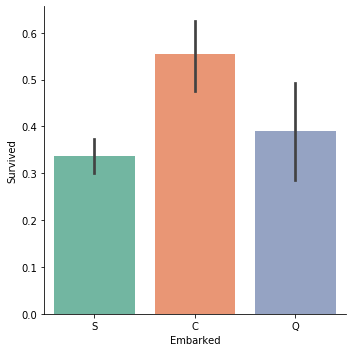

In [91]:
# Explore Embarked vs Survived 
emb = sns.catplot(data = train_df,
                x = "Embarked",
                y = "Survived",
                height = 5,
                kind = "bar",
                palette = "Set2")

# Setting X labels
emb.set_xticklabels(fontweight = 'light',
                    fontsize = 'medium')

- Seems most of the travellers that survived had embarked from Cherbourg (C).
- This could be because maybe most travellers embarked from that port OR maybe something else entirely.

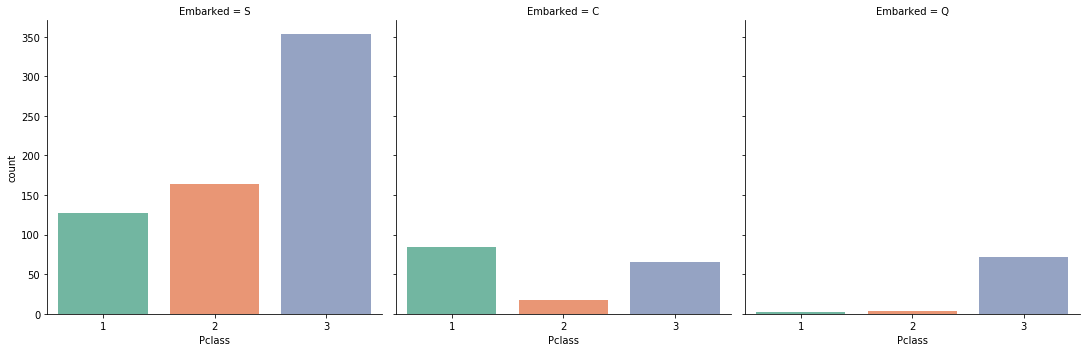

In [89]:
# Explore Embarked vs Survived 
emb = sns.catplot(data = train_df,
                x = "Pclass",#Pclass
                col = "Embarked", #Embarked
                height = 5,
                kind = "count",
                palette = "Set2")

# Setting X labels
emb.set_xticklabels(fontweight = 'light',
                    fontsize = 'medium')

- Whoops! Turns out to be something else entirely. SO, it is clear that most passengers boarded at the Southampton(S) port. However, it is interesting to note that, most travellers embarking from port Cherbourg(C) were in the first class. Most of this lot survived, which then explains the previous visual.

In [110]:
from collections import Counter

def numerical_outliers(df,num_cols,n=2):
    """
    Takes a dataframe df and a list of numerical columns.
    Returns a list of the indices for outliers outside the IQR score.
    """
    outliers = []
    
    # iterate over features(columns)
    for cols in num_cols:
        # calc the 1st quartile 
        Q1 = np.percentile(df[cols], 25)
        
        # calc the 3rd quartile
        Q3 = np.percentile(df[cols], 75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier threshold
        outlier_thresh = (1.5 * IQR)
        
        # for the column under consideratoin, filter in the outliers
        outliers_loop = df[(df[cols] < Q1 - outlier_thresh) | (df[cols] > Q3 + outlier_thresh )].index
        
        # append the original list for outliers 
        outliers.extend(outliers_loop)
        
    # select observations containing more than n outliers
    outliers = Counter(outliers)  
    
    # Create list comprehension to filter in the wanted values
    multiple_outliers = list( k for k, v in outliers.items() if v > n )
    
    return multiple_outliers

In [99]:
train_df.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [120]:
# detect outliers from Age, SibSp , Parch and Fare
outliers_ix = numerical_outliers(df = train_df,
                                      num_cols = train_df.select_dtypes(include='number').columns)

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [167]:
outliers = pd.DataFrame()

# calc the 1st quartile 
Q1 = np.percentile(train_df['Fare'], 25)

# calc the 3rd quartile
Q3 = np.percentile(train_df['Fare'], 75)

# Interquartile range (IQR)
IQR = Q3 - Q1

# outlier threshold
outlier_thresh = (1.5 * IQR)
        

In [168]:
# for the column under consideratoin, filter in the outliers
outliers_loop = train_df[(train_df['Fare'] < (Q1 - outlier_thresh)) | (train_df['Fare'] > (Q3 + outlier_thresh))]
outliers_loop.loc[:,'tag'] = 'Fare'
outliers = outliers.append(outliers_loop)

In [170]:
multiple_outliers = list( k for k, v in outliers.items() if v > 2 )
multiple_outliers

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Resoruces:

1. Detecting Outliers: [Yassine Ghouzam's Kernel](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)